In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.api import OLS

In [2]:
df = pd.read_csv('players_2024_11_26.csv')

In [3]:
df.head()

,id,name,now_cost,position,team,expected_goals_conceded_per_90,ep_next,cost_change_start_fall,expected_goal_involvements_per_90,creativity,...,value_season,expected_assists,ict_index,starts,penalties_missed,penalties_order,event_points,selected_rank_type,minutes,threat
0,1,Fábio Ferreira Vieira,54,MID,Arsenal,0.00,0.0,1,0.00,0.0,...,0.0,0.00,0.0,0,0,NaN,0,279,0,0.0
1,2,Gabriel Fernando de Jesus,68,FWD,Arsenal,0.73,1.8,2,0.40,62.9,...,1.0,0.12,16.2,2,0,NaN,1,36,211,76.0
2,3,Gabriel dos Santos Magalhães,61,DEF,Arsenal,1.02,3.8,-1,0.17,67.5,...,8.4,0.50,51.9,12,0,NaN,6,3,1043,180.0
3,4,Kai Havertz,79,FWD,Arsenal,1.08,2.0,1,0.51,137.4,...,5.8,1.12,73.1,11,0,3.0,0,10,990,359.0
4,5,Karl Hein,40,GKP,Arsenal,0.00,0.0,0,0.00,0.0,...,0.0,0.00,0.0,0,0,NaN,0,68,0,0.0


In [4]:
df = df.drop(columns=['id', 'name', 'chance_of_playing_this_round', 'direct_freekicks_order','news_added', 'bps',
                      'cost_change_event_fall', 'region', 'cost_change_start_fall', 'cost_change_event',
                      'now_cost_rank_type', 'transfers_out', 'transfers_out_event'])

In [5]:
df['now_cost'] = df['now_cost']/10

In [6]:
df['pp_million'] = round(df['total_points']/df['now_cost'],1)
df['ppmin'] = round((df['total_points']*100)/df['minutes'],1)
df['g+a'] = df['goals_scored'] + df['assists']
df['ep_2wk_rolling'] = df['ep_this'] + df['ep_next']

In [7]:
df['ep_2wk_rolling']

0      0.0
1      3.6
2      7.6
3      4.0
4      0.0
      ... 
679    0.0
680    1.4
681    0.0
682    0.6
683    2.2
Name: ep_2wk_rolling, Length: 684, dtype: float64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 684 entries, 0 to 683
Data columns (total 71 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   now_cost                              684 non-null    float64
 1   position                              684 non-null    object 
 2   team                                  684 non-null    object 
 3   expected_goals_conceded_per_90        684 non-null    float64
 4   ep_next                               684 non-null    float64
 5   expected_goal_involvements_per_90     684 non-null    float64
 6   creativity                            684 non-null    float64
 7   selected_rank                         684 non-null    int64  
 8   now_cost_rank                         684 non-null    int64  
 9   status                                684 non-null    object 
 10  creativity_rank                       684 non-null    int64  
 11  in_dreamteam       

In [9]:
df['total_points_rank'] = df['total_points'].rank(ascending=False, method='min')
df['pp_million_rank'] = df['pp_million'].rank(ascending=False, method='min')
df['ep_2wk_rolling_rank'] = df['ep_2wk_rolling'].rank(ascending=False, method='min')
df['points_per_game_rank'] = df['points_per_game'].rank(ascending=False, method='min')

In [10]:
gkp_df = df[df['position']=='GKP']
def_df = df[df['position']=='DEF']
mid_df = df[df['position']=='MID']
fwd_df = df[df['position']=='FWD']

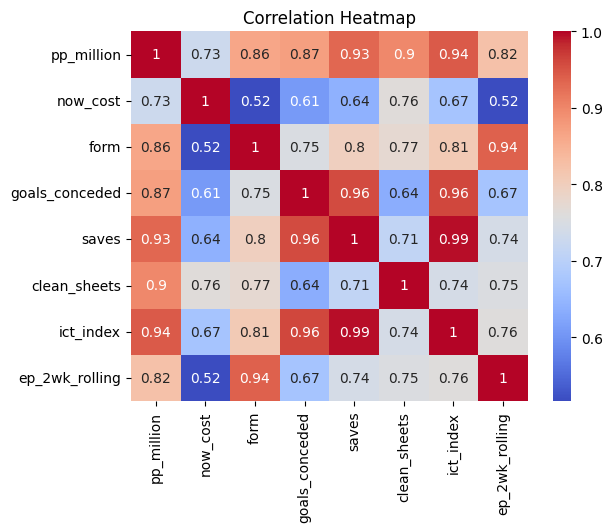

In [11]:
numeric_df = gkp_df[['pp_million', 'now_cost', 'form', 'goals_conceded', 'saves', 'clean_sheets', 'ict_index', 'ep_2wk_rolling']]
#plt.figure(figsize=(15, 10))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

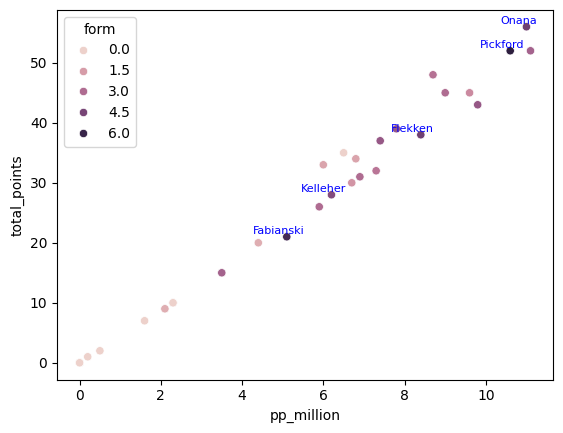

In [12]:
ax = sns.scatterplot(x='pp_million', 
                     y='total_points',
                     data=gkp_df,
                     hue='form')

top_10_gkp_df = gkp_df.nlargest(5, 'ep_2wk_rolling')

for x, y, label in zip(top_10_gkp_df['pp_million'], top_10_gkp_df['total_points'], top_10_gkp_df['web_name']):
    plt.text(x = x-0.2,
             y = y+0.05,
             s = label,
             color = 'blue',
             fontsize=8,
             ha='center',
             va='bottom')

plt.show()

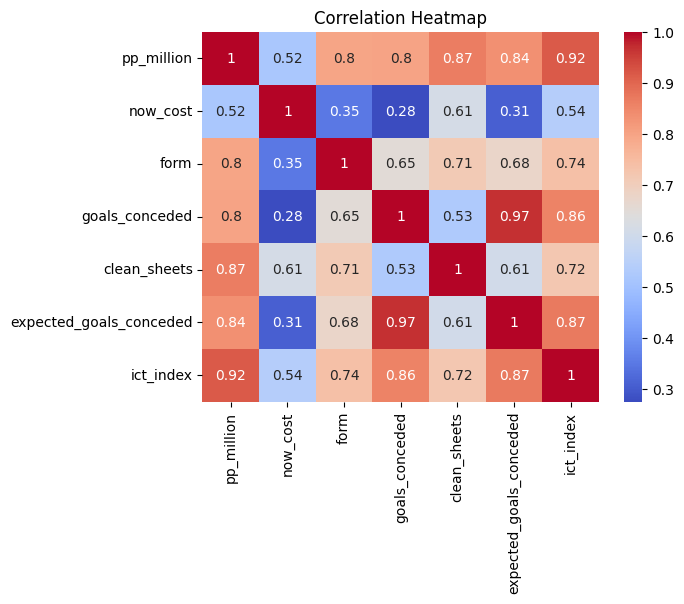

In [13]:
numeric_df = def_df[['pp_million', 'now_cost', 'form', 'goals_conceded', 'clean_sheets', 'expected_goals_conceded', 'ict_index']]
#plt.figure(figsize=(15, 10))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

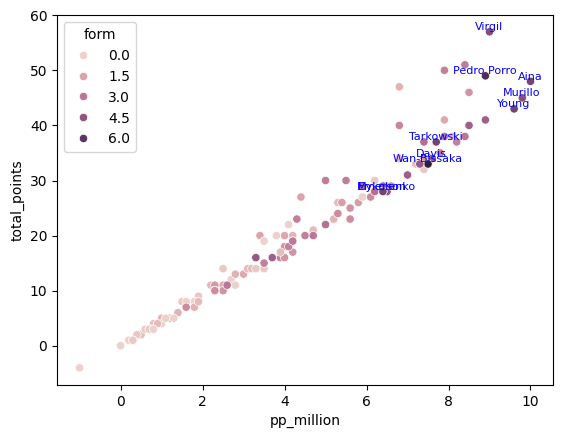

In [14]:
ax = sns.scatterplot(x='pp_million', 
                     y='total_points',
                     data=def_df,
                     hue='form')

top_10_def_df = def_df.nlargest(10, 'ep_2wk_rolling')

for x, y, label in zip(top_10_def_df['pp_million'], top_10_def_df['total_points'], top_10_def_df['web_name']):
    plt.text(x = x-0.01,
             y = y+0.01,
             s = label,
             color = 'blue',
             fontsize=8,
             ha='center',
             va='bottom')

plt.show()

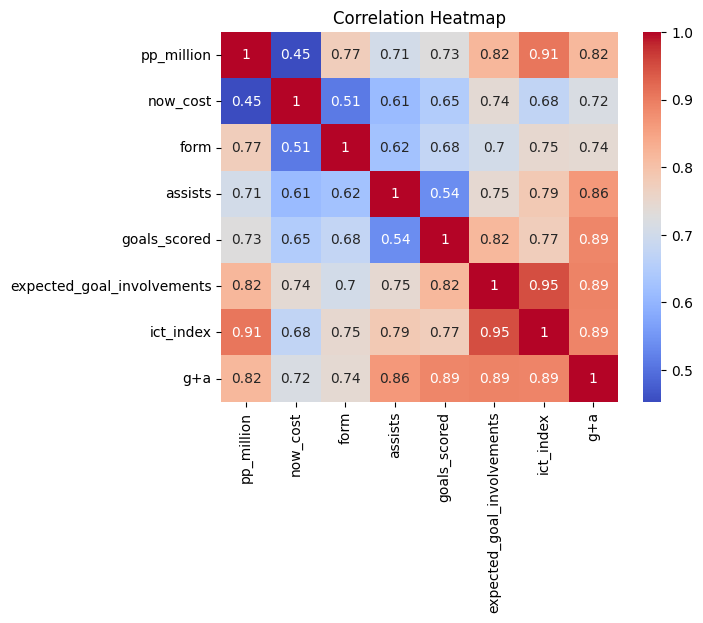

In [15]:
numeric_df = mid_df[['pp_million', 'now_cost', 'form', 'assists', 'goals_scored', 'expected_goal_involvements', 'ict_index', 'g+a']]
#plt.figure(figsize=(15, 10))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

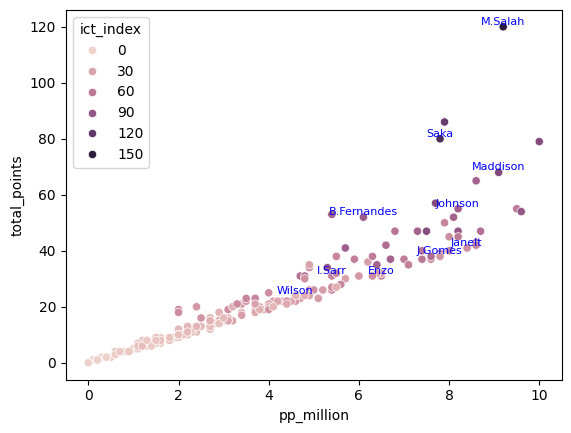

In [16]:
ax = sns.scatterplot(x='pp_million', 
                     y='total_points',
                     data=mid_df,
                     hue='ict_index')

top_10_mid_df = mid_df.nlargest(10, 'ep_2wk_rolling')

for x, y, label in zip(top_10_mid_df['pp_million'], top_10_mid_df['total_points'], top_10_mid_df['web_name']):
    plt.text(x = x-0.01,
             y = y+0.01,
             s = label,
             color = 'blue',
             fontsize=8,
             ha='center',
             va='bottom')

plt.show()

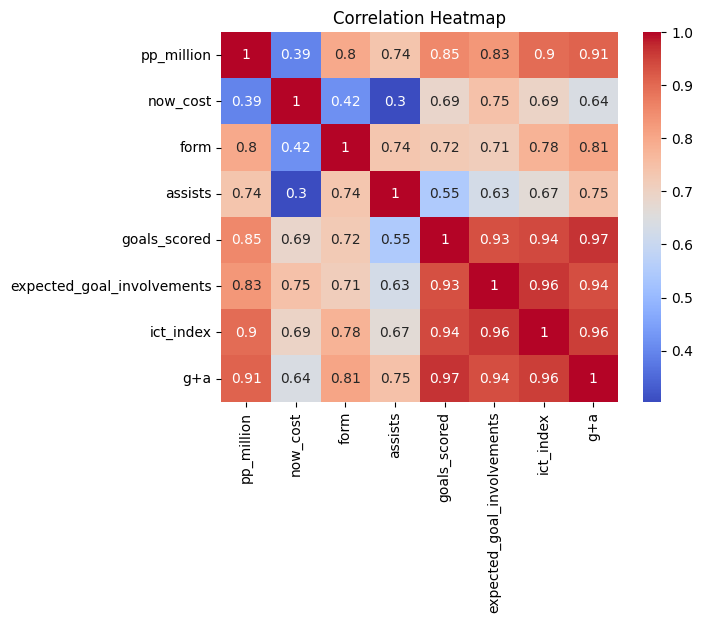

In [17]:
numeric_df = fwd_df[['pp_million', 'now_cost', 'form', 'assists', 'goals_scored', 'expected_goal_involvements', 'ict_index', 'g+a']]
#plt.figure(figsize=(15, 10))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

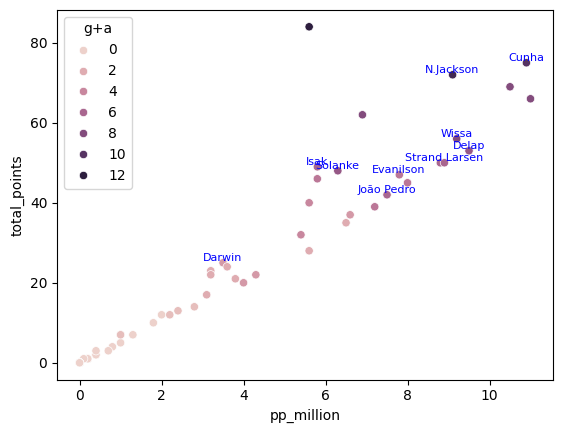

In [18]:
ax = sns.scatterplot(x='pp_million', 
                     y='total_points',
                     data=fwd_df,
                     hue='g+a')

top_10_fwd_df = fwd_df.nlargest(10, 'ep_2wk_rolling')

for x, y, label in zip(top_10_fwd_df['pp_million'], top_10_fwd_df['total_points'], top_10_fwd_df['web_name']):
    plt.text(x = x-0.01,
             y = y+0.01,
             s = label,
             color = 'blue',
             fontsize=8,
             ha='center',
             va='bottom')

plt.show()

In [19]:
g_ppm = gkp_df.nlargest(2, 'pp_million')
d_ppm = def_df.nlargest(5, 'pp_million')
m_ppm = mid_df.nlargest(5, 'pp_million')
f_ppm = fwd_df.nlargest(3, 'pp_million')

In [20]:
g_ppm = g_ppm[['web_name', 'team', 'now_cost', 'position']]
d_ppm = d_ppm[['web_name', 'team', 'now_cost', 'position']]
m_ppm = m_ppm[['web_name', 'team', 'now_cost', 'position']]
f_ppm = f_ppm[['web_name', 'team', 'now_cost', 'position']]

In [21]:
ppm_15 = pd.concat([g_ppm,d_ppm,m_ppm,f_ppm])

In [22]:
g_form = gkp_df.nlargest(2, 'form')
d_form= def_df.nlargest(5, 'form')
m_form = mid_df.nlargest(5, 'form')
f_form = fwd_df.nlargest(3, 'form')

In [23]:
g_form = g_form[['web_name', 'team', 'now_cost', 'position']]
d_form = d_form[['web_name', 'team', 'now_cost', 'position']]
m_form = m_form[['web_name', 'team', 'now_cost', 'position']]
f_form = f_form[['web_name', 'team', 'now_cost', 'position']]

In [24]:
form_15 = pd.concat([g_form, d_form, m_form, f_form])
form_15

,web_name,team,now_cost,position
274,Pickford,Everton,4.9,GKP
625,Fabianski,West Ham,4.1,GKP
616,Wan-Bissaka,West Ham,4.4,DEF
596,Pedro Porro,Spurs,5.5,DEF
275,Tarkowski,Everton,4.8,DEF
277,Young,Everton,4.5,DEF
509,Aina,Nott'm Forest,4.8,DEF
398,M.Salah,Liverpool,13.1,MID
444,B.Fernandes,Man Utd,8.5,MID
665,J.Gomes,Wolves,4.9,MID


In [25]:
g_2wk = gkp_df.nlargest(2, 'ep_2wk_rolling')
d_2wk = def_df.nlargest(5, 'ep_2wk_rolling')
m_2wk = mid_df.nlargest(5, 'ep_2wk_rolling')
f_2wk = fwd_df.nlargest(3, 'ep_2wk_rolling')

In [26]:
g_2wk = g_2wk[['web_name', 'team', 'now_cost', 'position']]
d_2wk = d_2wk[['web_name', 'team', 'now_cost', 'position']]
m_2wk = m_2wk[['web_name', 'team', 'now_cost', 'position']]
f_2wk = f_2wk[['web_name', 'team', 'now_cost', 'position']]

In [27]:
rolling_2wk_15 = pd.concat([g_2wk, d_2wk, m_2wk, f_2wk])
rolling_2wk_15

,web_name,team,now_cost,position
274,Pickford,Everton,4.9,GKP
625,Fabianski,West Ham,4.1,GKP
616,Wan-Bissaka,West Ham,4.4,DEF
596,Pedro Porro,Spurs,5.5,DEF
408,Virgil,Liverpool,6.3,DEF
275,Tarkowski,Everton,4.8,DEF
277,Young,Everton,4.5,DEF
398,M.Salah,Liverpool,13.1,MID
444,B.Fernandes,Man Utd,8.5,MID
665,J.Gomes,Wolves,4.9,MID


In [28]:
players_of_note = pd.concat([ppm_15, form_15, rolling_2wk_15])
#players_of_note.drop_duplicates(subset='web_name', keep='first')
players_of_note.value_counts()

web_name     team           now_cost  position
Young        Everton        4.5       DEF         3
Cunha        Wolves         6.9       FWD         3
M.Salah      Liverpool      13.1      MID         3
B.Fernandes  Man Utd        8.5       MID         2
Wan-Bissaka  West Ham       4.4       DEF         2
Virgil       Liverpool      6.3       DEF         2
Tarkowski    Everton        4.8       DEF         2
Solanke      Spurs          7.6       FWD         2
Pickford     Everton        4.9       GKP         2
Pedro Porro  Spurs          5.5       DEF         2
Aina         Nott'm Forest  4.8       DEF         2
Maddison     Spurs          7.5       MID         2
João Pedro   Brighton       5.6       FWD         2
J.Gomes      Wolves         4.9       MID         2
Fabianski    West Ham       4.1       GKP         2
McNeil       Everton        5.6       MID         1
Murillo      Nott'm Forest  4.6       DEF         1
Mbeumo       Brentford      7.9       MID         1
Mazraoui     Man 

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingRegressor 
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [30]:
names_list = [
    'Virgil', 'Murillo', 'Aina', 'Kluivert', 'SMith Rowe', 'Sels', 'Pickford', 'B.Fernandes', 
    'Mbuemo', 'M.Salah', 'Wood', 'Cunha', 'Gvardiol', 'Konaté', 'Rogers', 'Wissa', 'Welbeck', 
    'Tarkowski', 'Szmodics', 'Delap', 'Evanilson', 'Robinson', 'Leno', 'Robertson', 'Onana', 
    'Isak', 'Iwobi', 'Jones', 'Kerkez', 'McNiel'
]

df['selected'] = df['web_name'].apply(lambda x: 1 if x in names_list else 0)

In [31]:
X = df[['now_cost_rank', 'ict_index_rank', 'form_rank', 'pp_million_rank', 'total_points_rank', 'ep_2wk_rolling_rank', 'points_per_game_rank']]
y = df['selected']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
#Random Forest Model
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

#Gradient Boosting Model:
model_gbr = GradientBoostingRegressor(n_estimators=100,)
model_gbr.fit(X_train, y_train)
y_pred_gbr = model_gbr.predict(X_test)

#Decision Tree Model:
model_dt = DecisionTreeRegressor()
model_dt.fit(X_train, y_train)
y_pred_dt = model_dt.predict(X_test)

#K Nearest Neighbours Model:
model_knn = KNeighborsRegressor(n_neighbors=10)
model_knn.fit(X_train, y_train)
y_pred_knn = model_knn.predict(X_test)

In [34]:
print("Classification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf))

print("Classification Report (Decision Tree):")
print(classification_report(y_test, y_pred_dt))

Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       133
           1       0.50      0.25      0.33         4

    accuracy                           0.97       137
   macro avg       0.74      0.62      0.66       137
weighted avg       0.96      0.97      0.97       137

Classification Report (Decision Tree):
              precision    recall  f1-score   support

           0       0.98      0.95      0.96       133
           1       0.12      0.25      0.17         4

    accuracy                           0.93       137
   macro avg       0.55      0.60      0.56       137
weighted avg       0.95      0.93      0.94       137



In [35]:
df_test = X_test.copy() 
df_test['actual'] = y_test 
df_test['predicted'] = y_pred_dt

df_test = pd.merge(left=df, right=df_test, 
                   left_on=['now_cost_rank', 'ict_index_rank', 'form_rank', 'pp_million_rank', 'total_points_rank', 'ep_2wk_rolling_rank', 'points_per_game_rank'],
                   right_on=['now_cost_rank', 'ict_index_rank', 'form_rank', 'pp_million_rank', 'total_points_rank', 'ep_2wk_rolling_rank', 'points_per_game_rank'],
                   how='left')

In [36]:
df2 = df_test[['web_name', 'predicted', 'actual']]

df2 = df2.dropna()

df2[df2['predicted'] > 0]

,web_name,predicted,actual
277,Young,1.0,0.0
395,Kelleher,1.0,0.0
468,Mazraoui,1.0,0.0
530,Sels,1.0,1.0
559,Larios,1.0,0.0
603,Son,1.0,0.0
606,Van de Ven,1.0,0.0
634,Souček,1.0,0.0


In [37]:
df2[df2['actual'] > 0]

,web_name,predicted,actual
82,Kerkez,0.0,1.0
405,Robertson,0.0,1.0
408,Virgil,0.0,1.0
530,Sels,1.0,1.0


In [ ]:
conflict_creation_cell = "Because I am changing this message across 2 commits"